# Importing packages

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mactop import mactop
import cooler
from matplotlib.colors import LinearSegmentedColormap

# paramaters setting

In [138]:
chr_num = 2
resolution = 50000
window_size = 50
tad_inflation = 1.6
variance=0.2
stable_cut_off = 20
community_inflation = 3
chromunity_inflation = 2

# Data preparation

## Dense matrix

<AxesSubplot:>

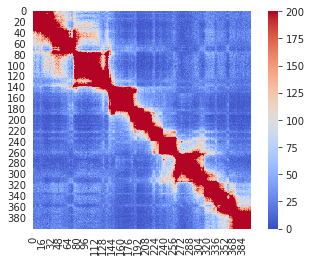

In [26]:
dense_matrix = np.loadtxt('/mnt/disk1/duanran/GM12878dense/GM128782')
# nomalize the matrix by ICE methods
ice_matrix_for_dense = mactop.original_matrix_to_ice_matrix(dense_matrix)
sns.heatmap(ice_matrix_for_dense[0:400,0:400], cmap='coolwarm', vmin=0, vmax=200,square=True)

## cool or mcool file

<AxesSubplot:>

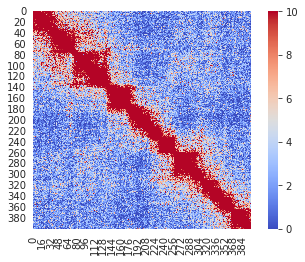

In [17]:
cool_file = cooler.Cooler("/mnt/disk1/duanran/Pore_c_data/GSM4490689_GM12878_NlaIII_e4379_GRCh38_bwa_0.7.17_sensitive_GIABhiconf_whatshap_0.19.c01520_default_cf00.mcool::/resolutions/50000")
cool_mat = cool_file.matrix(balance=False).fetch('chr{0}'.format(chr_num))
ice_matrix_for_cool = mactop.original_matrix_to_ice_matrix(cool_mat)
sns.heatmap(ice_matrix_for_cool[0:400,0:400], cmap='coolwarm', vmin=0, vmax=10,square=True)

## mutiway reads file

<AxesSubplot:>

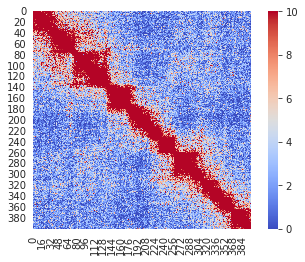

In [24]:
# load contacts data
ori_data_not_change = pd.read_csv(
    '/mnt/disk1/duanran/Pore_c_data/GSM4490689_GM12878_DpnII_83be7_GRCh38_bwa_0.7.17_sensitive_GIABhiconf_whatshap_0.19.c01520_default.contacts.csv.gz')
mutiway_mat = mactop.get_mat_from_muti_reads(ori_data_not_change,chr_num,resolution)
ice_matrix_for_mutiway = mactop.original_matrix_to_ice_matrix(mutiway_mat)
sns.heatmap(ice_matrix_for_cool[0:400,0:400], cmap='coolwarm', vmin=0, vmax=10,square=True)

# Call TADs

In [65]:
tads_dense,consistentmat = mactop.call_tad(ice_matrix_for_mutiway, inflation=tad_inflation, window_size=window_size, variance=variance,stable_cut_of = stable_cut_off)

begin cluster
get consistent matrix


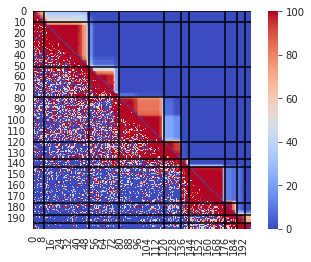

,begin,begin_type,end,end_type
0,0,dynamic,10,stable
1,10,stable,51,stable
2,51,stable,79,dynamic
3,79,dynamic,120,stable
4,120,stable,136,stable
5,136,stable,143,stable
6,143,stable,176,stable
7,176,stable,187,dynamic
8,187,dynamic,195,stable
9,195,stable,213,stable


In [64]:
tads_dense.head()
rbegin = 0
rend = 200
merge_mat = np.triu(consistentmat[0:200,0:200],1)+np.tril(ice_matrix_for_mutiway[0:200,0:200]*50,-1)
sns.heatmap(merge_mat, cmap='coolwarm', vmin=0, vmax=100,square=True)
tp_re = tads_dense['begin'].tolist()
for i in range(len(tp_re)):
    plt.plot([tp_re[i]-rbegin, tp_re[i]-rbegin], [0, rend-rbegin], color='black')
    plt.plot([0, rend-rbegin], [tp_re[i]-rbegin, tp_re[i]-rbegin], color='black')
plt.show()
tads_dense.head(10)

# Call Communities

In [129]:
community_for_each_tad = mactop.call_community(tads_dense,ice_matrix_for_mutiway,inflation= community_inflation)
community_for_each_tad

[array([0, 1, 3]),
 array([0, 1, 3]),
 array([ 2, 57, 58, 60, 63, 64]),
 array([0, 1, 3]),
 array([4]),
 array([ 5, 66]),
 array([ 6,  9, 16, 17, 61]),
 array([7]),
 array([ 8, 10]),
 array([ 6,  9, 16, 17, 61]),
 array([ 8, 10]),
 array([11]),
 array([ 12, 124, 177]),
 array([13, 65, 67, 68, 69]),
 array([14, 70]),
 array([15]),
 array([ 6,  9, 16, 17, 61]),
 array([ 6,  9, 16, 17, 61]),
 array([18]),
 array([19]),
 array([20, 21, 22, 72]),
 array([20, 21, 22, 72]),
 array([20, 21, 22, 72]),
 array([ 23,  26,  71, 197]),
 array([24]),
 array([ 25, 132]),
 array([ 23,  26,  71, 197]),
 array([27]),
 array([28, 30]),
 array([29]),
 array([28, 30]),
 array([31, 36, 37, 38]),
 array([32, 33]),
 array([32, 33]),
 array([34]),
 array([35]),
 array([31, 36, 37, 38]),
 array([31, 36, 37, 38]),
 array([31, 36, 37, 38]),
 array([ 39,  42,  79, 106]),
 array([40]),
 array([41]),
 array([ 39,  42,  79, 106]),
 array([43]),
 array([44]),
 array([ 45, 108, 309]),
 array([46]),
 array([ 47,  82,  83

# Call Chromunity

In [139]:
select_chr_reads = ori_data_not_change[(ori_data_not_change['align1_chrom'] == 'chr{0}'.format(chr_num)) & (
        ori_data_not_change['align2_chrom'] == 'chr{0}'.format(chr_num))]
chromunity = mactop.call_chromunity(select_chr_reads, resolution, tads_dense, chromunity_inflation)

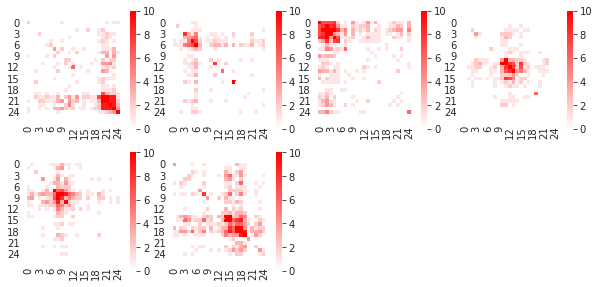

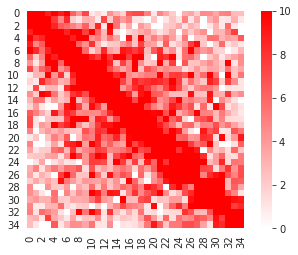

In [128]:
white_red = LinearSegmentedColormap.from_list('white_to_red', ['white', 'red'])
plt.figure(figsize=(10, 10))
units = chromunity[24]
for i in range(len(units)):
    plt.subplot(4, 4, i+1)
    sns.heatmap(units[i], cmap=white_red, vmin=0, vmax=10,square=True)
plt.show()

sns.heatmap(ice_matrix_for_mutiway[420:455,420:455], cmap=white_red, vmin=0, vmax=10,square=True)
plt.show()
